In [26]:
## Import necessary modules

import matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import os

from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.signal import savgol_filter, periodogram

from Wavefront import utils, wavefft

pylab.rcParams['figure.figsize'] = 12, 9

## Set directories for convenience
main_directory = '/nfs/slac/g/ki/ki19/lsst/snyder18'
data_directory = '/nfs/slac/g/ki/ki19/lsst/snyder18/Data'
results_directory = '/nfs/slac/g/ki/ki19/lsst/snyder18/Results'

In [38]:
subdirectory = "ugp_When_2015.11.6_5.7.50_poldm_phase_GPI"

Zdatapath = os.path.join(results_directory, subdirectory, '{}_coefficients.csv'.format(subdirectory))
PSDdatapath = os.path.join(results_directory, subdirectory, '{}_periodograms.csv'.format(subdirectory))

coefficients = np.loadtxt(Zdatapath, dtype=np.float64, delimiter=',')
PSDdata = np.loadtxt(PSDdatapath, dtype=np.float64, delimiter=',')

periodograms = PSDdata[:,1:]
f = PSDdata[:,0]

print os.path.basename(Zdatapath) ## print out the datapath names
print coefficients.shape

ugp_When_2015.11.6_5.7.50_poldm_phase_GPI_coefficients.csv
(59698, 37)


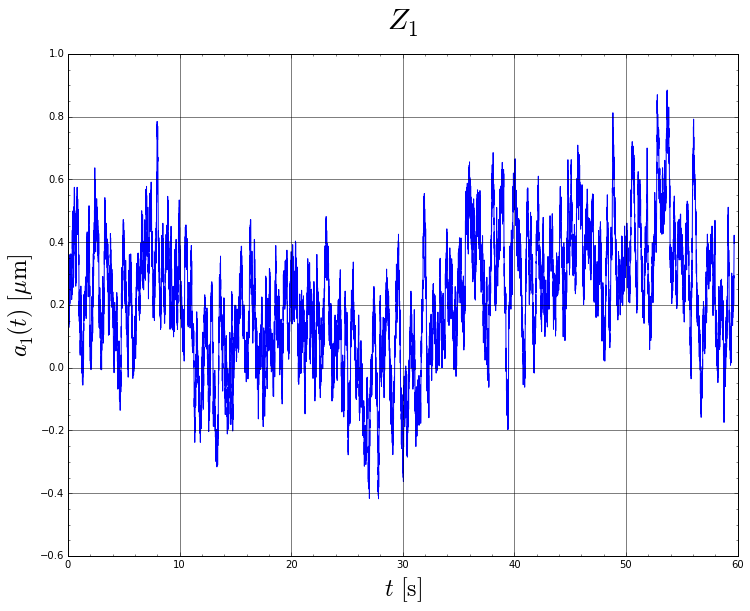

In [48]:
T = np.arange(0, coefficients.shape[0]/1000., 0.001)

Z_noll = 1

fig = plt.figure()
ax = fig.add_subplot(111)
img = ax.plot(T, coefficients[:, Z_noll-1])
ax.minorticks_on()
ax.grid(b=True, which='major', color='black', linestyle='-')
ax.set_ylabel(r'$a_{{{0}}}(t)$ $[\mu\mathrm{{m}}]$'.format(Z_noll), fontsize=24)
ax.set_xlabel(r'$t$ $[\mathrm{s}]$', fontsize=24)
ax.set_title(r'$Z_{{{0}}}$'.format(Z_noll), fontsize=30, y=1.04)

In [1]:
Z_noll = 13

fig = plt.figure()
ax = fig.add_subplot(111)
smoothed = 10**savgol_filter(np.log10(periodograms[:, Z_noll-1]), 101, 5)

## Perform linear fit to smoothed PSD
par = np.polyfit(np.log10(f[f>1.]), np.log10(smoothed[f>1.]), 1)
slope = par[0]
intercept = par[1]

## Plot original PSD, smoothed PSD, and linear fit
img = ax.loglog(f[1:], smoothed[1:], 'r',
                f[f>1.], (10**intercept)*f[f>1.]**slope, 'g')

ax.legend(['Smoothed PSD', 'slope = {0:.2f}, intercept={1:.2f}'.format(slope, intercept)], loc=3, fontsize=18)

ax.minorticks_on()
ax.grid(b=True, which='major', color='black', linestyle='-')
ax.set_ylabel(r'$\mathrm{{PSD}} \,\, [\mu\mathrm{{m}}^2/\mathrm{{Hz}}]$'.format(Z_noll), fontsize=24)
ax.set_xlabel(r'$f$ $\mathrm{[Hz]}$', fontsize=24)
ax.set_title(r'$Z_{{{0}}}$'.format(Z_noll), fontsize=30, y=1.04)

NameError: name 'plt' is not defined